In [1]:
# Momentum-Based Trading Strategy Simulator

import matplotlib.pyplot as plt
import random as rm
import itertools as it

# Simulate 100 days of price data with small daily fluctuations
def simulate_100() -> list[float]:
    """
    Generates a 100-day price series where each day changes randomly
    between -2% and +2% from the previous day.
    """
    price_seq = [100.0]

    for _ in range(99):
        new_price = price_seq[-1] * (1 + rm.uniform(-0.02, 0.02))
        price_seq.append(new_price)

    return price_seq


In [2]:
def momentum_strategy_1d() -> list[float]:
    """
    1-day momentum signal:
    If price increased yesterday, buy today.
    If price decreased yesterday, short today.
    """
    prices = simulate_100()
    pnl = []

    for i in range(1, len(prices) - 1):
        if prices[i] > prices[i - 1]:  # Momentum up
            pnl.append(prices[i + 1] - prices[i])
        elif prices[i] < prices[i - 1]:  # Momentum down
            pnl.append(prices[i] - prices[i + 1])
        else:
            pnl.append(0.0)  # No movement → no trade

    return pnl



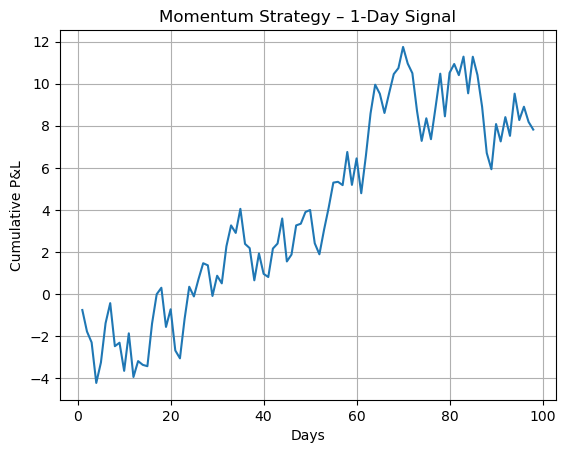

In [3]:
# Visualize single run
pnl_1d = momentum_strategy_1d()
cumulative_1d = list(it.accumulate(pnl_1d))

plt.plot(range(1, 99), cumulative_1d)
plt.xlabel("Days")
plt.ylabel("Cumulative P&L")
plt.title("Momentum Strategy – 1-Day Signal")
plt.grid()
plt.show()

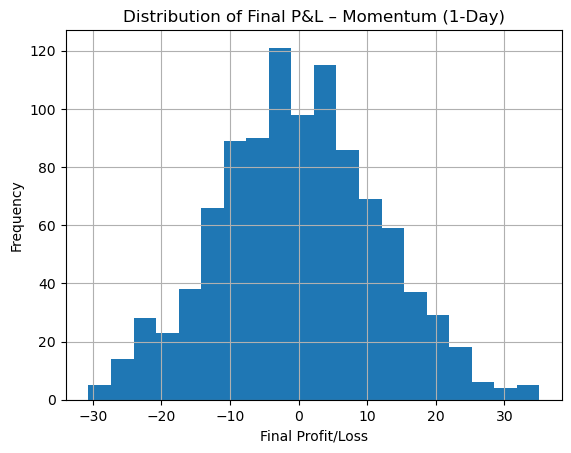

In [4]:
# Histogram over multiple runs
final_pnl_1d = []

for _ in range(1000):
    pnl = momentum_strategy_1d()
    cumulative = list(it.accumulate(pnl))
    final_pnl_1d.append(cumulative[-1])

plt.hist(final_pnl_1d, bins=20)
plt.title("Distribution of Final P&L – Momentum (1-Day)")
plt.xlabel("Final Profit/Loss")
plt.ylabel("Frequency")
plt.grid()
plt.show()


In [5]:
def momentum_strategy_2d() -> list[float]:
    """
    2-day momentum signal:
    If price increased for 2 consecutive days, buy.
    Else, short.
    """
    prices = simulate_100()
    pnl = []

    for i in range(2, len(prices) - 1):
        if prices[i] > prices[i - 1] and prices[i - 1] > prices[i - 2]:
            pnl.append(prices[i + 1] - prices[i])
        else:
            pnl.append(prices[i] - prices[i + 1])

    return pnl


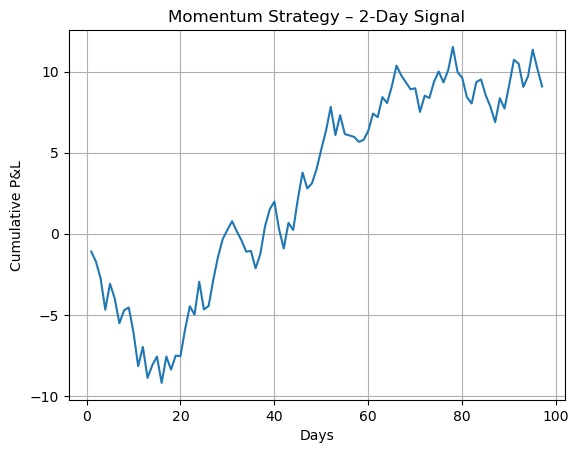

In [6]:
# Visualize single run
pnl_2d = momentum_strategy_2d()
cumulative_2d = list(it.accumulate(pnl_2d))

plt.plot(range(1, 98), cumulative_2d)
plt.xlabel("Days")
plt.ylabel("Cumulative P&L")
plt.title("Momentum Strategy – 2-Day Signal")
plt.grid()
plt.show()


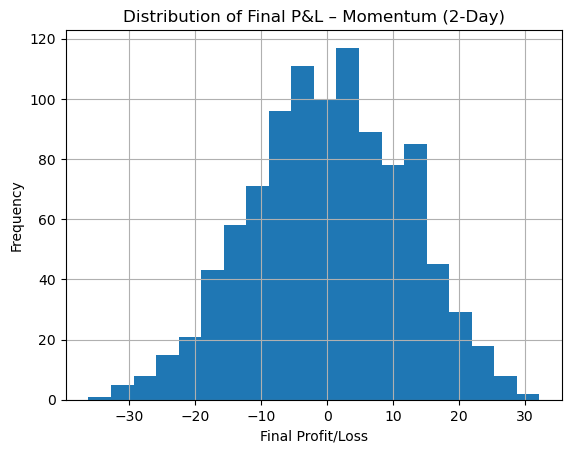

In [7]:
# Histogram over multiple runs
final_pnl_2d = []

for _ in range(1000):
    pnl = momentum_strategy_2d()
    cumulative = list(it.accumulate(pnl))
    final_pnl_2d.append(cumulative[-1])

plt.hist(final_pnl_2d, bins=20)
plt.title("Distribution of Final P&L – Momentum (2-Day)")
plt.xlabel("Final Profit/Loss")
plt.ylabel("Frequency")
plt.grid()
plt.show()


In [8]:
def momentum_strategy_3d() -> list[float]:
    """
    3-day momentum signal:
    If price increased for 3 consecutive days, buy.
    Else, short.
    """
    prices = simulate_100()
    pnl = []

    for i in range(3, len(prices) - 1):
        if (prices[i] > prices[i - 1] and 
            prices[i - 1] > prices[i - 2] and 
            prices[i - 2] > prices[i - 3]):
            pnl.append(prices[i + 1] - prices[i])
        else:
            pnl.append(prices[i] - prices[i + 1])

    return pnl


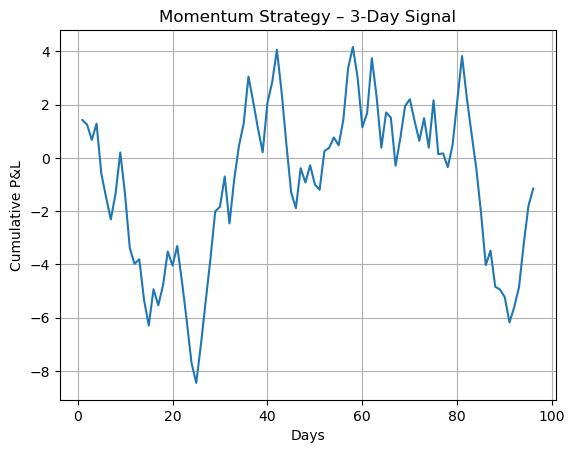

In [11]:
# Visualize single run
pnl_3d = momentum_strategy_3d()
cumulative_3d = list(it.accumulate(pnl_3d))

plt.plot(range(1, 97), cumulative_3d)
plt.xlabel("Days")
plt.ylabel("Cumulative P&L")
plt.title("Momentum Strategy – 3-Day Signal")
plt.grid()
plt.show()


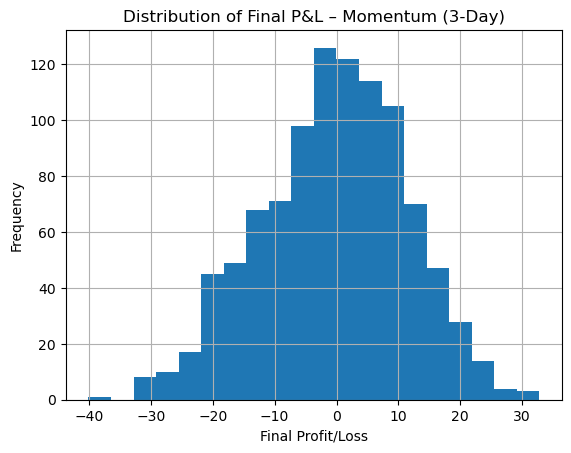

In [10]:
# Histogram over multiple runs
final_pnl_3d = []

for _ in range(1000):
    pnl = momentum_strategy_3d()
    cumulative = list(it.accumulate(pnl))
    final_pnl_3d.append(cumulative[-1])

plt.hist(final_pnl_3d, bins=20)
plt.title("Distribution of Final P&L – Momentum (3-Day)")
plt.xlabel("Final Profit/Loss")
plt.ylabel("Frequency")
plt.grid()
plt.show()
